In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [4]:
df['DateID'] = pd.to_datetime(df['DateID'])

In [5]:
df.head(10)

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,2021-11-06,7
1,category_4,836584,2021-11-18,16
2,category_1,370195,2022-01-24,6
3,category_2,172582,2021-10-30,5
4,category_2,1006009,2021-10-30,5
5,category_2,903976,2022-01-06,1
6,category_1,145978,2021-10-30,3
7,category_1,1061341,2022-01-24,5
8,category_1,371239,2022-01-05,1
9,category_2,865933,2022-02-08,3


In [6]:
df.isnull().sum()

CategoryCode    0
ItemCode        0
DateID          0
DailySales      0
dtype: int64

In [7]:
df['week'] = pd.to_datetime(df['DateID']).dt.week

C:\Users\NISHAD~1\AppData\Local\Temp/ipykernel_38736/1792957466.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = pd.to_datetime(df['DateID']).dt.week


In [8]:
def find_week(week):
    if week%4==3:
        return 'w1'
    elif week%4==0:
        return 'w2'
    elif week%4==1:
        return 'w3'
    else:
        return 'w4'
    

In [9]:
df['week_name'] = df['week'].apply(lambda x:find_week(x))

In [10]:
df.head(10)

,CategoryCode,ItemCode,DateID,DailySales,week,week_name
0,category_2,117610,2021-11-06,7,44,w2
1,category_4,836584,2021-11-18,16,46,w4
2,category_1,370195,2022-01-24,6,4,w2
3,category_2,172582,2021-10-30,5,43,w1
4,category_2,1006009,2021-10-30,5,43,w1
5,category_2,903976,2022-01-06,1,1,w3
6,category_1,145978,2021-10-30,3,43,w1
7,category_1,1061341,2022-01-24,5,4,w2
8,category_1,371239,2022-01-05,1,1,w3
9,category_2,865933,2022-02-08,3,6,w4


In [11]:
df_week = df.drop(['DateID','week'], axis = 1,)

In [12]:
df_week.head()

,CategoryCode,ItemCode,DailySales,week_name
0,category_2,117610,7,w2
1,category_4,836584,16,w4
2,category_1,370195,6,w2
3,category_2,172582,5,w1
4,category_2,1006009,5,w1


In [13]:
new_column = df_week.groupby(['week_name','CategoryCode','ItemCode'])['DailySales'].mean()

In [14]:
df_week.set_index(["week_name", "CategoryCode","ItemCode"], inplace = True,append = True, drop = True)

In [15]:
clean_data = new_column.to_frame()

In [16]:
clean_data.head()

DailySales
week_name CategoryCode ItemCode            
w1        category_1   3418        9.700000
                       3427        7.064516
                       17287       4.157895
                       17296      81.387097
                       24136       5.366667

In [17]:
import math

clean_data['weeklySales'] = clean_data['DailySales'].apply(lambda x:math.ceil(x))

In [18]:
final_df = clean_data.drop(['DailySales'], axis = 1,)

In [19]:
final_df.head()

weeklySales
week_name CategoryCode ItemCode             
w1        category_1   3418               10
                       3427                8
                       17287               5
                       17296              82
                       24136               6

In [20]:
train_data=final_df.reset_index()

In [21]:
train_data['weeklySales'] = train_data['weeklySales'].apply(lambda x:x*7)

In [22]:
train_data.head(1000)

,week_name,CategoryCode,ItemCode,weeklySales
0,w1,category_1,3418,70
1,w1,category_1,3427,56
2,w1,category_1,17287,35
3,w1,category_1,17296,574
4,w1,category_1,24136,42
...,...,...,...,...
771,w4,category_4,1003192,49
772,w4,category_4,1024810,70
773,w4,category_4,1060909,119
774,w4,category_4,1074823,294


In [23]:
#Setting the value for X and Y
x = train_data[['week_name','CategoryCode','ItemCode']]
y = train_data['weeklySales']

In [24]:
x = pd.get_dummies(data=x, drop_first=True)

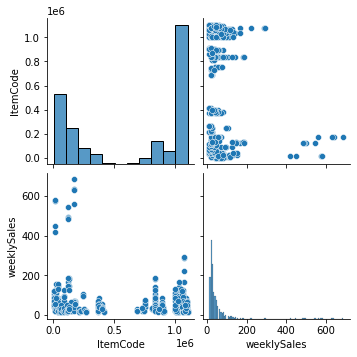

In [47]:
 sns.pairplot(train_data) 

In [25]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x, y)


LinearRegression()

In [26]:
test_data = pd.read_csv("validation_data.csv")

In [27]:
test_data.rename(columns = {'Week':'week_name', 'WeeklySales':'weeklySales'}, inplace = True)

In [28]:
test_data.head()

,CategoryCode,ItemCode,week_name,weeklySales
0,category_2,1044502,w1,11
1,category_2,1105009,w1,11
2,category_2,913561,w4,5
3,category_1,1048975,w4,30
4,category_1,17287,w2,60


In [29]:
test_data = test_data[['week_name', 'CategoryCode', 'ItemCode', 'weeklySales']]

In [30]:
test_data.head()

,week_name,CategoryCode,ItemCode,weeklySales
0,w1,category_2,1044502,11
1,w1,category_2,1105009,11
2,w4,category_2,913561,5
3,w4,category_1,1048975,30
4,w2,category_1,17287,60


In [31]:
#Setting the value for X and Y
x_test = test_data[['week_name','CategoryCode','ItemCode']]
y_test = test_data['weeklySales']


x_test = pd.get_dummies(data=x_test, drop_first=True)

In [32]:
y_pred_mlr= mlr.predict(x_test)

In [33]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(15)

,Actual value,Predicted value
0,11,19.870750
1,11,17.930240
2,5,20.389725
3,30,32.634297
4,60,67.164697
5,18,55.271922
6,7,15.360574
7,23,106.654856
8,2,49.834578
9,4,89.321253


<AxesSubplot:xlabel='Actual value', ylabel='Predicted value'>

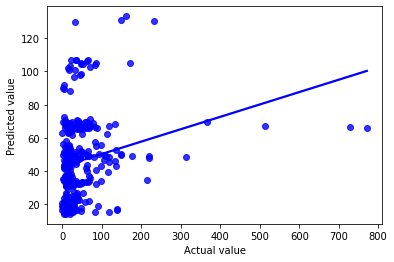

In [45]:
import seaborn as sns

sns.regplot(x=mlr_diff['Actual value'], y=mlr_diff['Predicted value'], ci=None, color="b")



In [34]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 15.06
Mean Absolute Error: 35.879363965210764
Mean Square Error: 5092.514779780045
Root Mean Square Error: 71.36185801799196


In [35]:
pred_data = pd.read_csv("test_data.csv")

pred_data.rename(columns = {'Week':'week_name'}, inplace = True)

pred_data = pred_data[['week_name', 'CategoryCode', 'ItemCode']]

In [36]:
#Setting the value for X and Y
x_pred = pred_data[['week_name','CategoryCode','ItemCode']]

x_pred = pd.get_dummies(data=x_pred, drop_first=True)

In [37]:
y_pred= mlr.predict(x_pred)


In [38]:
submission = pd.DataFrame({'CategoryCode':pred_data['CategoryCode'],'ItemCode':pred_data['ItemCode'],'Week':pred_data['week_name'],'PredictedSales': y_pred})

submission['PredictedSales'] = submission['PredictedSales'].apply(lambda x:math.ceil(x))

submission.head(15)

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,65
1,category_2,1006090,w1,22
2,category_2,1076929,w4,16
3,category_1,1081321,w3,33
4,category_2,216151,w4,43
5,category_3,1063600,w4,68
6,category_4,1082743,w3,104
7,category_4,23200,w1,141
8,category_1,1068883,w1,36
9,category_2,838456,w3,24


In [39]:
submission.to_csv(r'D:\Jupyter Files\DataStorm\submission.csv', index = False)

In [40]:
#category_1_itemcode_week


submission['ID'] = submission[['CategoryCode', 'ItemCode','Week']].apply(tuple, axis=1)

In [41]:
submission.head(15)

,CategoryCode,ItemCode,Week,PredictedSales,ID
0,category_1,43738,w4,65,"(category_1, 43738, w4)"
1,category_2,1006090,w1,22,"(category_2, 1006090, w1)"
2,category_2,1076929,w4,16,"(category_2, 1076929, w4)"
3,category_1,1081321,w3,33,"(category_1, 1081321, w3)"
4,category_2,216151,w4,43,"(category_2, 216151, w4)"
5,category_3,1063600,w4,68,"(category_3, 1063600, w4)"
6,category_4,1082743,w3,104,"(category_4, 1082743, w3)"
7,category_4,23200,w1,141,"(category_4, 23200, w1)"
8,category_1,1068883,w1,36,"(category_1, 1068883, w1)"
9,category_2,838456,w3,24,"(category_2, 838456, w3)"


In [42]:
submission['ID'] = submission['ID'].split(", ")

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
submission['ID']=submission['CategoryCode'].astype(str)+'_'+submission['ItemCode'].astype(str)+'_'+submission['Week']


In [ ]:
submission.head(15)

In [ ]:
submission = pd.DataFrame({'ID':submission['ID'],'WeeklySales':submission['PredictedSales']})

In [ ]:
submission.head(15)

In [ ]:
submission.to_csv(r'D:\Jupyter Files\DataStorm\submission.csv', index = False)

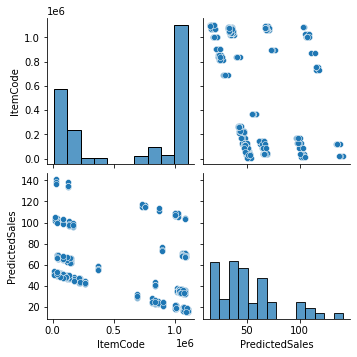

In [48]:
 sns.pairplot(submission) 

In [ ]:
sns.regplot(x=mlr_diff['Actual value'], y=mlr_diff['Predicted value'], ci=None, color="b")